# First Milestone

### Fandom Trends and Pecularities From AO3 Data

#### Made by: Rebekah Washburn (u1310114), Noble Ledbetter (u0967666), and Henry Brunisholz (u1276675)

## Description

The data we are analyzing was collected in 2020 by reddit user theCodeCat, who scraped non-user-restricted fan-works from ArchiveOfOurOwn (AO3). The data is available for download [here](https://www.reddit.com/r/datasets/comments/i254cw/archiveofourown_dataset/), and is in a SQLite database.

After processing, our initial sample consists of ~100,000 fan-works with the following information contained in two files - reduced_project_info and reduced_chapter_text.

reduced_project_info contains the following data about these fan-works:
- id
- title (user entered)
- date published (user entered)
- language (user entered)
- rating (user entered)
- completion status (user entered)
- number of words
- number of hits
- number of kudos
- number of comments
- number of bookmarks
- description  (user entered)

reduced_chapter_text contains the following data:
- id
- chapter number
- chapter text (user entered)


For final analysis, we will be including more works in the sample, but for reasons of space and speed - we are using a smaller sample for now.

## Acquistion

Acquistion was done via downloading the scrapped AO3 data provided by theCodeCat, the link in the "Description" section contains that data available for download.

## Cleaning

The data we aquired was already well organized and cleaned, but since it was stored in an SQLite3 database, we needed to extract the information and organize it into dataframes. The following is code from our file, "SQLite3_to_csv". It will not run properly, as I cannot include the SQLite3 file due to its size.


In [ ]:
import pandas as pd
import csv
import sqlite3

# This code grabs the main, numerical data
conn = sqlite3.connect("organizedData.sqlite3")
df = pd.DataFrame()

query_1 = "SELECT id, title, date, language, restricted, rating, finished, words, hits, kudos, bookmarks, comments, description FROM StoryHeaders LIMIT 100000"
query_2 = "SELECT * from Languages"
query_3 = "SELECT * from Ratings"
query_4 = "SELECT * from FinishedState"
# Info on LIMIT: https://www.w3schools.com/sql/sql_top.asp

pd.read_sql_query(query_3, conn)
df = pd.read_sql_query(query_1, conn)
lan = pd.read_sql_query(query_2, conn)
rat = pd.read_sql_query(query_3, conn)
fin = pd.read_sql_query(query_4, conn)
conn.close()

print("done")

Once we have turned the main data into a data frame, the data frame "df" is left with integers in columns such as Language. However, numbers like these are only given text values in the three other data frames we created. We next take the text info from "lan", "rat", and "fin", and bring it into "df".

In [ ]:
df["LanguageName"] = None
df["RatingName"] = None
df["FinishedStatus"] = None

# I perpetually chain my indexes, so I used these to help me fix my code: https://stackoverflow.com/questions/32357311/python-pandas-how-to-avoid-chained-assignment
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

for index in df.index.to_list():
    lan_df = df["language"]
    try:
        for iden in lan.index.to_list():
            if int(lan_df.iloc[index]) == int(lan.loc[iden, "id"]):
                df.loc[index, "LanguageName"] = lan.loc[iden, "Language_Name"]
    except:
        pass
    
    rat_df = df["rating"]
    try:
        for iden in rat.index.to_list():
            if int(rat_df.iloc[index]) == int(rat.loc[iden, "id"]):
                df.loc[index, "RatingName"] = rat.loc[iden, "name"]
    except:
        pass

    fin_df = df["finished"]
    try:
        for iden in fin.index.to_list():
            if int(fin_df.iloc[index]) == int(fin.loc[iden, "id"]):
                df.loc[index, "FinishedStatus"] = fin.loc[iden,"name"]
    except:
        pass
    
print("done")

We then store our data in a csv file. Though the next cell would typically be code, I am marking it as text to make sure it is not accidentally run, and loses our information.

### Code
import os

 #This bit creates a csv of the Data Frame from the above code
 
#DO NOT RUN! 

try:
    os.remove('reduced_project_info.csv')
except:
    pass

df.to_csv('reduced_project_info.csv')
print('done')

We also wanted to look at chapter text from our collected works. We grab the first 1000 stored chapters. Note that for this part we have not yet sorted the chapters to only collect from books we are analyzing numerical information for. We plan to add to this later so that we look at chapter text for books we are analyzing in the original data frame.

In [ ]:
import pandas as pd
import csv
import sqlite3

# This code retrieves text from the first 1000 chapters

conn = sqlite3.connect("organizedData.sqlite3")
query_chapts = "SELECT storyId, idx, text FROM Chapters LIMIT 1000"

chapters = pd.read_sql_query(query_chapts, conn)

# We want the "text" column, as someone has already sorted through it for us (I love theCodeCat!)

chapters = chapters.rename(columns={"idx": "chapterNumber"})
print(chapters)

We then save the file in a csv file, like we did with the "df" data frame. Since the code for this looks almost identical to the code provided above, I am not included it so it does not get run, and thus wipes our retrieved data. 

Our last bit of cleaning focuses on the tags attached to works. These tags may contain the fandom the work is about, characters in the story, or key components in the story. We start by grabbing the works and the tagIds attached to each work. In the entire database, there are nearly 90,000,000 tag uses. Note, we are still working on how to pull enough information to be useful, while not overwhelming Jupyter Notebook or our computers.

In [ ]:
import pandas as pd
import csv
import sqlite3

# This code will grab the tags assigned to each story, and will grab the tagId's text meaning, and the type
# of tag it is. For now, we are just working with the tags assigned to stories. 
# (Code for grabbing the tagId's name and type is commented out.)

conn = sqlite3.connect("organizedData.sqlite3")
#query_tags = "SELECT id, name, type FROM Tags"
query_story_tags = "SELECT * FROM TagLinks"

# tags_data = pd.read_sql_query(query_tags, conn)
story_tags_data = pd.read_sql_query(query_story_tags, conn)

# print(story_tags)
print(story_tags_data)

We then save the "story_tags_data" to a csv, and then do some additional cleaning after grabbing the information from "reduced_project_info.csv", grab the first 10000 stories, and filter out all other works in our tag data frame.

In [ ]:
import pandas as pd
import csv
import sqlite3

data = pd.read_csv("story_tags.csv")
sample_dat = pd.read_csv("reduced_project_info.csv")
sample_dat = sample_dat.iloc[:10000]

unique_works = []

for numb in sample_dat["id"]:
    if numb not in unique_works:
        unique_works.append(numb)

iden_numb = data.index.to_list()

tag_data = data.copy(deep = True)
tag_data = tag_data.iloc[:100000]
tag_dat = tag_data.copy(deep= True)

numbs = tag_data.index.to_list()

count = 0
# This just helps me know the code is still running.

for iden in numbs:
    if int(tag_data.loc[iden, "storyId"]) not in unique_works:
        tag_dat.drop([iden], inplace = True)
        count += 1
        print(count)
        
print("done")

We then save this to a csv. We then use this new file, "small_story_tags.csv", and use it to pull the specific tag names and their type from the SQLite3 database.

In [ ]:
import pandas as pd
import csv
import sqlite3

# Assessing Top Tags
data = pd.read_csv("small_story_tags.csv")
try:
    data= data.drop(columns=["Unnamed: 0.1", "Unnamed: 0"])
except:
    pass

counts = data["tagId"].value_counts()
print("done")

conn = sqlite3.connect("organizedData.sqlite3")


for value in counts.index.to_list():
    query_1 = f"SELECT id, name, type FROM Tags WHERE id = {value}"
    df = pd.read_sql_query(query_1, conn)
    for index in data.index.to_list():
        if data.loc[index, "tagId"] == value:
            data.loc[index, "Tag Name"] = df.loc[0, "name"]
            data.loc[index, "Tag Type"] = df.loc[0, "type"]
        
conn.close()
print(data)
print("done")

We then save this as an updated "small_story_tags.csv", and thus our cleaning for our sample set is done, and we can start analyzing the data.

## Ethical Data Concerns

From the project proposal, our concerns were threefold: 
- First, that the authors of the fanworks analyzed did not consent to their data being collected.
- Second, that personal information could be discovered.
- Third, that our analysis could contribute to the poor public perception of fanfiction.

After preliminary analysis, we have a better perspective on these ethical risks:
- Firstly, while authors were not contacted to ask for their consent, they did put their works in publically-accessible places. Additionally, since we are not collecting data, but are analyzing data collected by someone else, the ethical risk seems more properly placed at theCoolCat's feet not ours.
- Secondly, while there may be personal information in our data, our preliminary data analysis has not uncovered anything, so this ethical risk seems less likely than it did before our analysis began.
- Thirdly, while fanfiction does have a negative reputation in the public eye, we still think that since we are not publishing our analysis in public that our project will have little reputational impact regardless of its findings. That being said, we have discovered that in our sample, more explicit/mature works are more popular among fanfic readers, garnering greater popularity. This reinforces the popular perception of fanfic-as-porn. However, we also found that a majority of works in our sample are rated "General" or "Teen", implying that most fanfic written is not pornographic, even if more explicit works are more popular.

## Analysis/Methods/Results

Our analysis consists of many smaller tasks, the code for these tasks is presented below.

### Setup

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from scipy.stats import ttest_ind

# Read the data from the file
data = pd.read_csv("reduced_project_info.csv")

# Drop rows with missing values
data.dropna(subset=['words', 'kudos', 'comments', 'bookmarks', 'hits'], inplace=True)

# Replace infinite values with NaN and drop rows with NaN values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=['words', 'kudos', 'comments', 'bookmarks', 'hits'], inplace=True)

### How correlated are different notions of popularity?

To answer this question, we will create a correlation matrix comparing our four possible measures of popularity - hits, kudos, comments, and bookmarks.

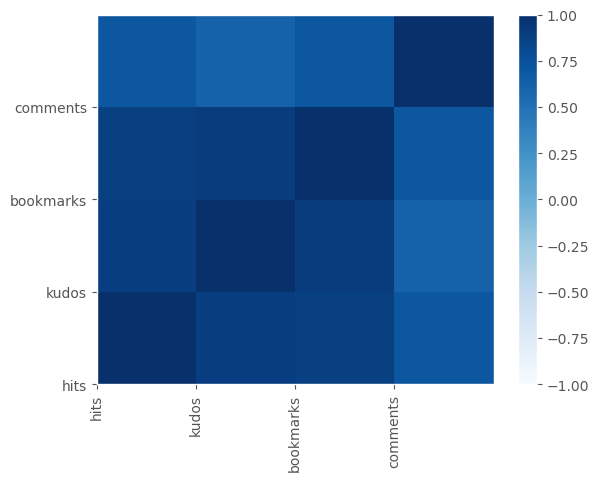

In [11]:
# Analyzing the Correlation Between Different Measures of Popularity

col_keep = ["hits", "kudos", "comments", "bookmarks"]

corr_data = data.copy(deep= True)

for col in corr_data.columns:
    if col not in col_keep:
        corr_data.drop(columns=[col], inplace = True)
        
corr_data = corr_data.corr()

heatmap = plt.pcolor(corr_data, cmap=plt.cm.Blues, vmin = -1, vmax = 1)
ticks = [x for x in range(0, len(corr_data.columns))]
labels = [x for x in corr_data.columns]
plt.xticks(ticks = ticks, labels = labels, rotation = 90)
plt.yticks(ticks = ticks, labels = labels)
# plot the legend on the side
plt.colorbar(heatmap)

### What languages are fanfics written in?

To answer this question we will count the number of works under each language in our data set and calculate the % of the total that they form.

In [12]:
lang = data.groupby('LanguageName').count()
print(lang['language'])
print()
print('Number of unique languages in data set:',len(lang))
print()
print('Number of entries in data set:',len(data))
print()
for i in range(len(lang['language'].index)):
    perc = round(lang['language'][i]/len(data),3)*100
    if perc >= 0.1:
        print(lang['language'].index[i], 'makes up', str(perc) + '% of the total data.')
    else:
        print(lang['language'].index[i], 'makes up less than 0.1% of the total data.')

LanguageName
Bahasa Indonesia           12
Dansk                       2
Deutsch                    91
English                 93117
Español                   221
Esperanto                   3
Français                   52
Gàidhlig                    1
Italiano                    6
Lingua latina               2
Magyar                      1
Nederlands                 10
Polski                     11
Português brasileiro       62
Suomi                       2
Svenska                     7
Tiếng Việt                  1
Čeština                     8
Русский                    77
中文                         30
Name: language, dtype: int64

Number of unique languages in data set: 20

Number of entries in data set: 93720

Bahasa Indonesia makes up less than 0.1% of the total data.
Dansk makes up less than 0.1% of the total data.
Deutsch makes up 0.1% of the total data.
English makes up 99.4% of the total data.
Español makes up 0.2% of the total data.
Esperanto makes up less than 0.1% of the t

### Summary Statistics

The summary statistics we will provide are:

    number of fanfics in the data set
    average word count
    % of fics finished
    number of fics for each rating
    average number of hits
    average number of kudos
    average number of comments
    average number of bookmarks

In [13]:
# Number of fanfics in the dataset
num_fanfics = len(data)

# Average word count
avg_word_count = data['words'].mean()

# Percentage of fics finished
percent_finished = (data['finished'].sum() / num_fanfics) * 100

# Number of fics for each rating
rating_counts = data['RatingName'].value_counts()

# Average number of hits
avg_hits = data['hits'].mean()

# Average number of kudos
avg_kudos = data['kudos'].mean()

# Average number of comments
avg_comments = data['comments'].mean()

# Average number of bookmarks
avg_bookmarks = data['bookmarks'].mean()

# Print summary statistics
print("Summary Statistics")
print(f"- Number of fanfics in the dataset: {num_fanfics}")
print(f"- Average word count: {avg_word_count:.2f}")
print(f"- Percentage of fics finished: {percent_finished:.2f}%")
print("- Number of fics for each rating:")
print(rating_counts)
print(f"- Average number of hits: {avg_hits:.2f}")
print(f"- Average number of kudos: {avg_kudos:.2f}")
print(f"- Average number of comments: {avg_comments:.2f}")
print(f"- Average number of bookmarks: {avg_bookmarks:.2f}")

Summary Statistics
- Number of fanfics in the dataset: 93720
- Average word count: 3723.91
- Percentage of fics finished: 94.79%
- Number of fics for each rating:
RatingName
General Audiences    31606
Teen And Up          27497
Explicit             17484
Mature               14347
Not Rated             2786
Name: count, dtype: int64
- Average number of hits: 1474.44
- Average number of kudos: 57.48
- Average number of comments: 3.96
- Average number of bookmarks: 8.84


### Are long fanfics more popular?
To answer this question we will create bar charts comparing the words in a fanfic to our four canidate measures of the popularity of a fanfic - kudos, comments, bookmarks, and hits. Then we will calculate the correlation coefficient between length and our measures of popularity.

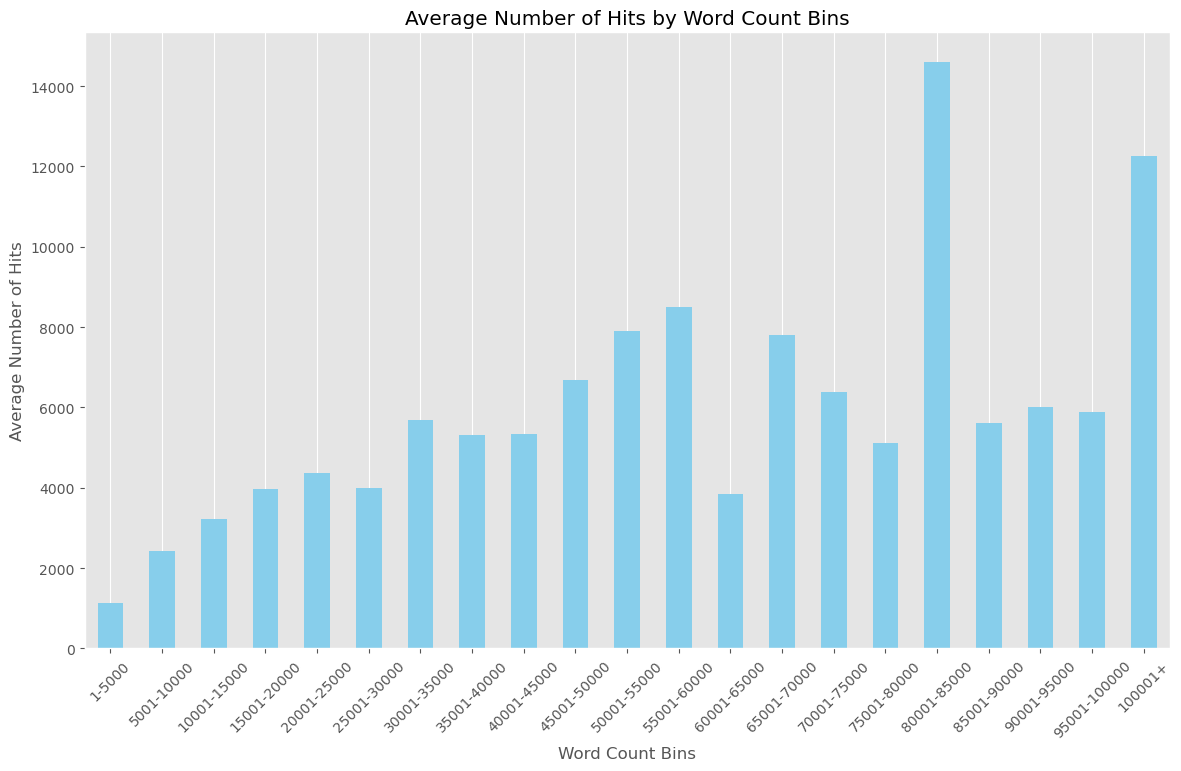

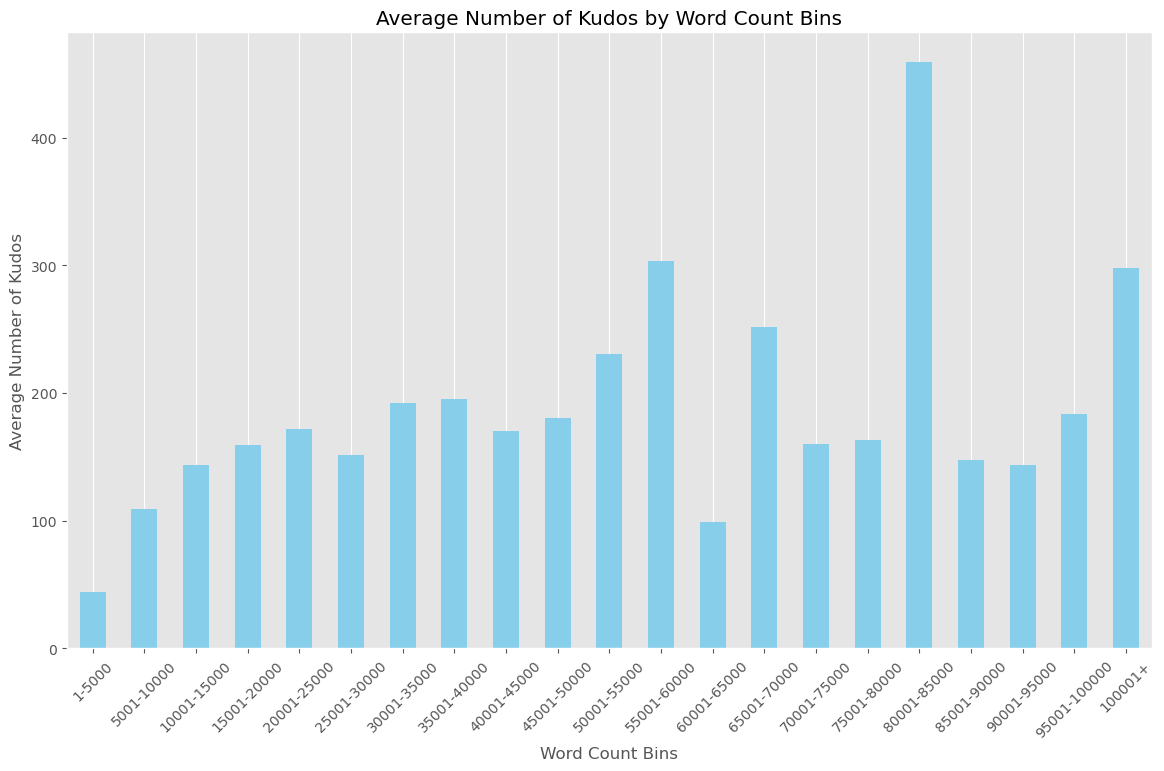

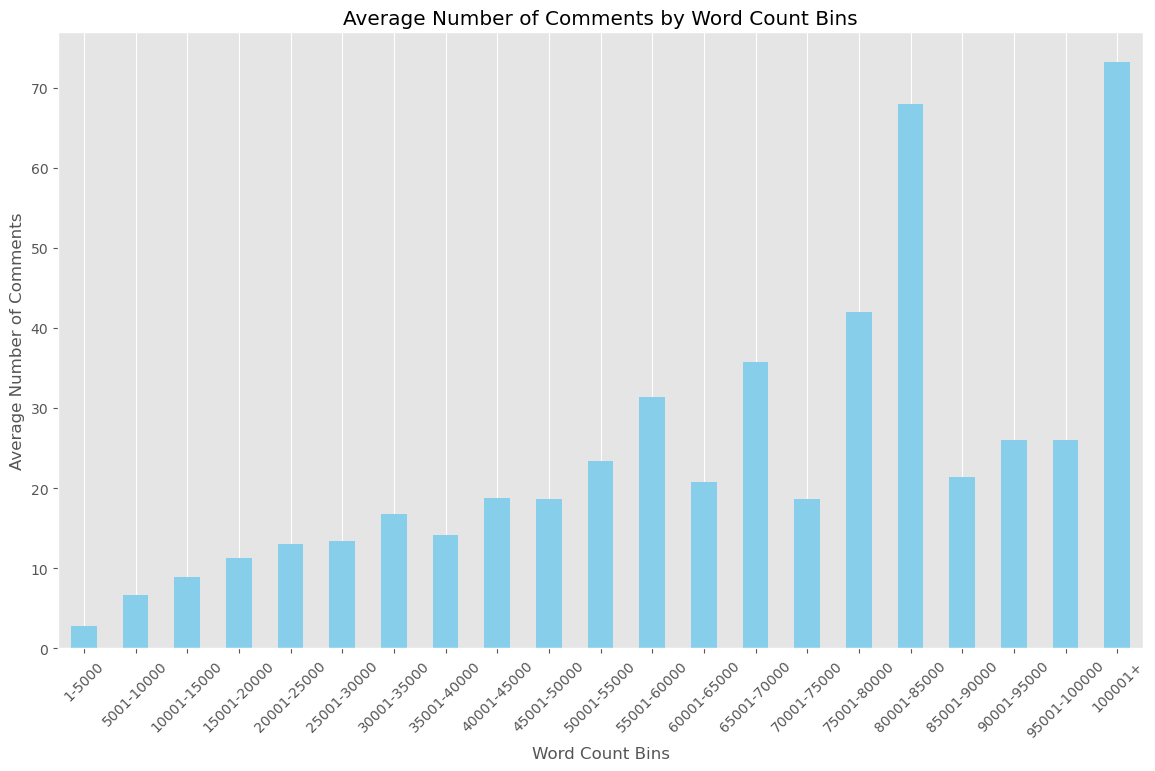

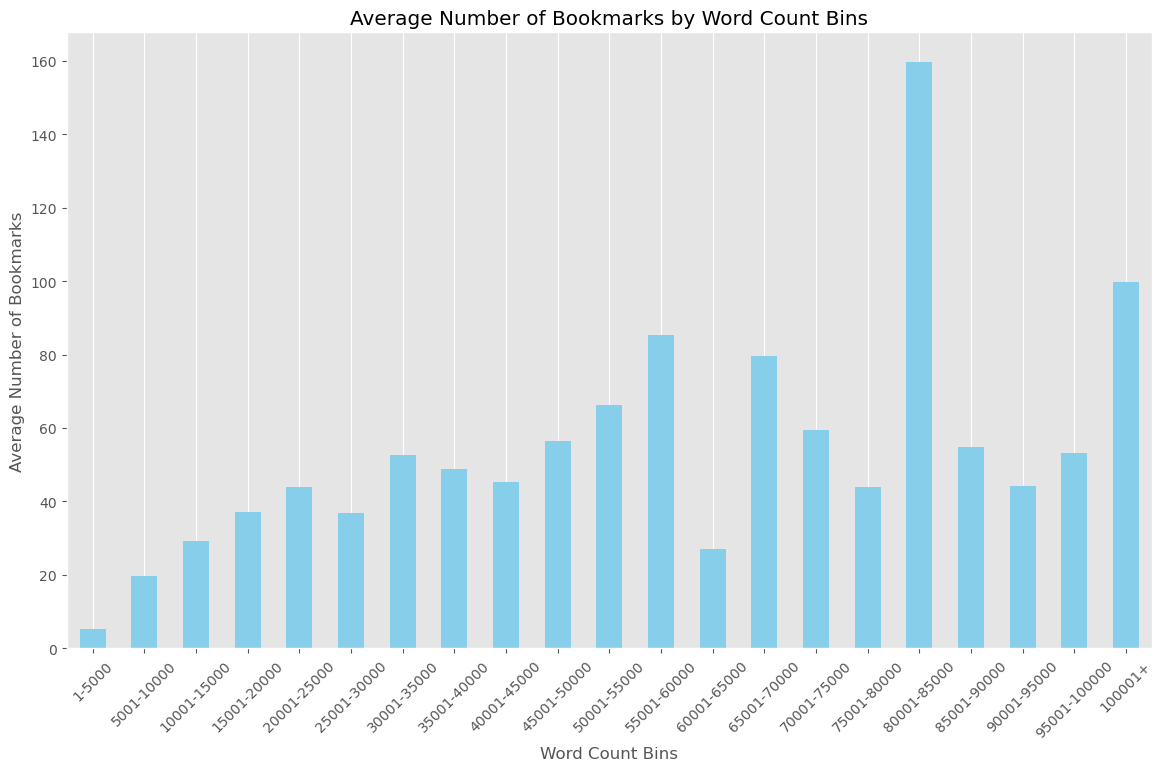

Pearson correlation coefficient (kudos): 0.12
P-value (kudos): 0.0000
Pearson correlation coefficient (comments): 0.30
P-value (comments): 0.0000
Pearson correlation coefficient (bookmarks): 0.15
P-value (bookmarks): 0.0000
Pearson correlation coefficient (hits): 0.17
P-value (hits): 0.0000


In [14]:
# Define the bins for word counts
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, float('inf')]

# Create a new column in the DataFrame to represent the bin for each fanfic
data['word_bin'] = pd.cut(data['words'], bins=bins, labels=['1-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', '25001-30000', '30001-35000', '35001-40000', '40001-45000', '45001-50000', '50001-55000', '55001-60000', '60001-65000', '65001-70000', '70001-75000', '75001-80000', '80001-85000', '85001-90000', '90001-95000', '95001-100000', '100001+'])

# Group the DataFrame by the word bins and calculate the average number of hits for each bin
average_hits_by_bin = data.groupby('word_bin')['hits'].mean()

# Plot the bar chart
plt.figure(figsize=(14, 8))
average_hits_by_bin.plot(kind='bar', color='skyblue')
plt.title('Average Number of Hits by Word Count Bins')
plt.xlabel('Word Count Bins')
plt.ylabel('Average Number of Hits')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Group the DataFrame by the word bins and calculate the average number of kudos for each bin
average_kudos_by_bin = data.groupby('word_bin')['kudos'].mean()

# Plot the bar chart
plt.figure(figsize=(14, 8))
average_kudos_by_bin.plot(kind='bar', color='skyblue')
plt.title('Average Number of Kudos by Word Count Bins')
plt.xlabel('Word Count Bins')
plt.ylabel('Average Number of Kudos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Group the DataFrame by the word bins and calculate the average number of comments for each bin
average_comments_by_bin = data.groupby('word_bin')['comments'].mean()

# Plot the bar chart
plt.figure(figsize=(14, 8))
average_comments_by_bin.plot(kind='bar', color='skyblue')
plt.title('Average Number of Comments by Word Count Bins')
plt.xlabel('Word Count Bins')
plt.ylabel('Average Number of Comments')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Group the DataFrame by the word bins and calculate the average number of bookmarks for each bin
average_bookmarks_by_bin = data.groupby('word_bin')['bookmarks'].mean()

# Plot the bar chart
plt.figure(figsize=(14, 8))
average_bookmarks_by_bin.plot(kind='bar', color='skyblue')
plt.title('Average Number of Bookmarks by Word Count Bins')
plt.xlabel('Word Count Bins')
plt.ylabel('Average Number of Bookmarks')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Calculate Pearson correlation coefficient for kudos
corr_kudos, p_value_kudos = pearsonr(data['words'], data['kudos'])
print(f"Pearson correlation coefficient (kudos): {corr_kudos:.2f}")
print(f"P-value (kudos): {p_value_kudos:.4f}")

# Calculate Pearson correlation coefficient for comments
corr_comments, p_value_comments = pearsonr(data['words'], data['comments'])
print(f"Pearson correlation coefficient (comments): {corr_comments:.2f}")
print(f"P-value (comments): {p_value_comments:.4f}")

# Calculate Pearson correlation coefficient and for bookmarks
corr_bookmarks, p_value_bookmarks = pearsonr(data['words'], data['bookmarks'])
print(f"Pearson correlation coefficient (bookmarks): {corr_bookmarks:.2f}")
print(f"P-value (bookmarks): {p_value_bookmarks:.4f}")

# Calculate Pearson correlation coefficient and for hits
corr_hits, p_value_hits = pearsonr(data['words'], data['hits'])
print(f"Pearson correlation coefficient (hits): {corr_hits:.2f}")
print(f"P-value (hits): {p_value_hits:.4f}")


### Are explicit fanfics more popular?
To answer this question we will create bar charts comparing a fanfic's rating to our four canidate measures of popularity - hits, kudos, comments, and bookmarks. We will then report if the differences in average popularity between ratings are statistically significant.

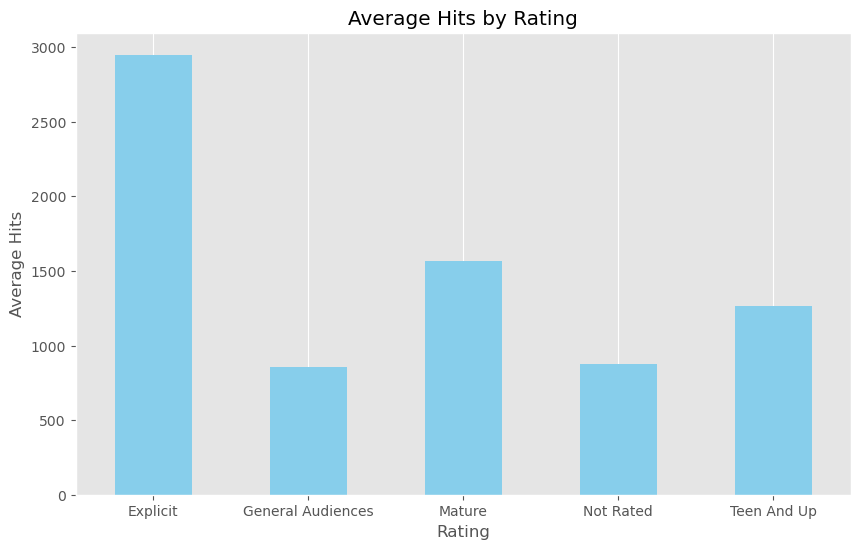

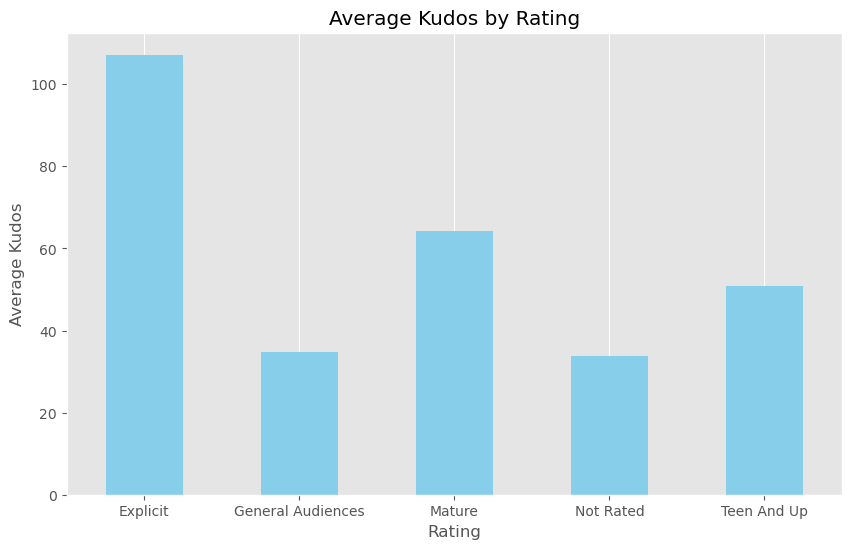

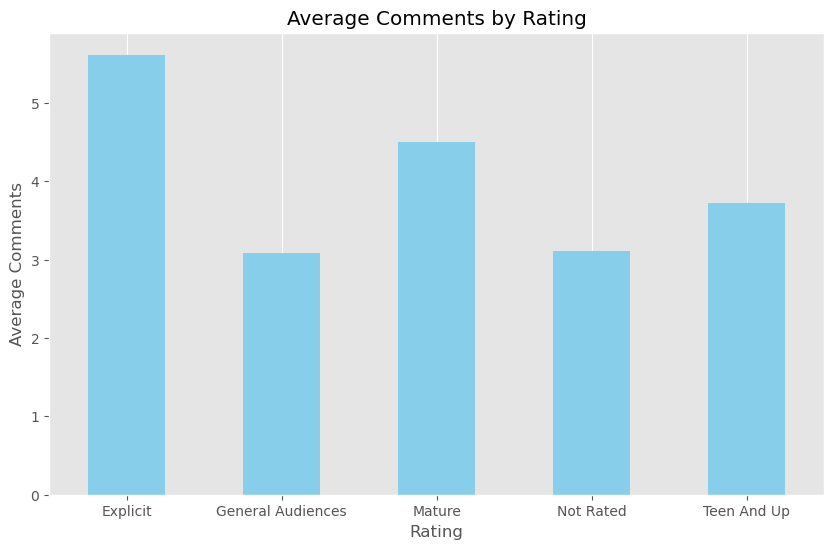

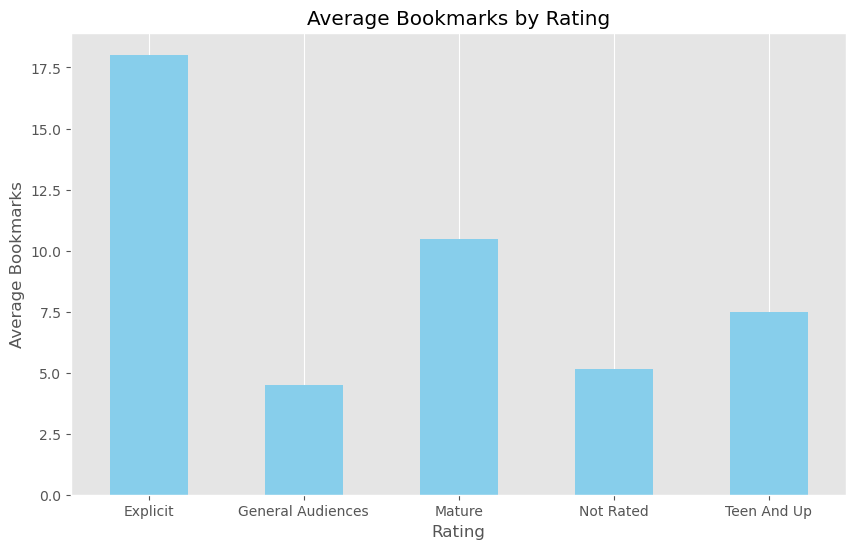

In [15]:
# Group the DataFrame by rating and calculate the average popularity metrics for each rating
average_popularity_by_rating = data.groupby('RatingName').agg({'hits': 'mean', 'kudos': 'mean', 'comments': 'mean', 'bookmarks': 'mean'})

# Plot the bar charts for each popularity metric
metrics = ['hits', 'kudos', 'comments', 'bookmarks']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    average_popularity_by_rating[metric].plot(kind='bar', color='skyblue')
    plt.title(f'Average {metric.capitalize()} by Rating')
    plt.xlabel('Rating')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()


In [ ]:
# Perform t-test to compare the average popularity metrics between different ratings
for metric in metrics:
    print(f"\nT-test results for {metric.capitalize()}:\n")
    for i in range(len(average_popularity_by_rating.index)):
        for j in range(i+1, len(average_popularity_by_rating.index)):
            rating1 = average_popularity_by_rating.index[i]
            rating2 = average_popularity_by_rating.index[j]
            avg1 = data[data['RatingName'] == rating1][metric]
            avg2 = data[data['RatingName'] == rating2][metric]
            t_statistic, p_value = ttest_ind(avg1, avg2)
            print(f"T-test between ratings {rating1} and {rating2}:")
            print(f"  - T-statistic: {t_statistic:.2f}")
            print(f"  - P-value: {p_value:.4f}")
            if p_value < 0.05:
                print("  - Statistically significant difference (p < 0.05)")
            else:
                print("  - No statistically significant difference (p >= 0.05)")


### Are finished works more popular?
To answer this question we will compare the average popularity of finished v. unfinished fanfictions for each of the four candidate measures of popularity, and report on whether the differences are statistically significant.

In [ ]:
# Group the DataFrame by "finished" column and calculate the average popularity metrics for each group
average_popularity_by_finished = data.groupby('finished').agg({'hits': 'mean', 'kudos': 'mean', 'comments': 'mean', 'bookmarks': 'mean'})

# Plot bar charts comparing the average popularity of finished vs. unfinished fanfictions for each popularity metric
metrics = ['hits', 'kudos', 'comments', 'bookmarks']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    average_popularity_by_finished[metric].plot(kind='bar', color='skyblue')
    plt.title(f'Average {metric.capitalize()} by Finished Status')
    plt.xlabel('Finished Status')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.xticks([1, 0], ['Finished', 'Unfinished'], rotation=0)  # Customize x-axis labels
    plt.grid(axis='y')
    plt.show()

# Perform t-test to compare the average popularity metrics between finished and unfinished fanfictions
print("T-test results:")
for metric in metrics:
    avg_finished = data[data['finished'] == 0][metric]
    avg_unfinished = data[data['finished'] == 1][metric]
    t_statistic, p_value = ttest_ind(avg_finished, avg_unfinished)
    print(f"T-test for {metric.capitalize()}:")
    print(f"  - T-statistic: {t_statistic:.2f}")
    print(f"  - P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  - Statistically significant difference (p < 0.05)")
    else:
        print("  - No statistically significant difference (p >= 0.05)")


### Are English fanfics more popular?

To answer this question, we will create a bar chart comparing fanfics written in English with those written in some other language for all four metrics of popularity, and see if the differences in popularity are statistically significant.

In [ ]:
# Define a function to categorize languages as English or not English
def categorize_language(language):
    return 'English' if language == 'English' else 'Not English'

# Apply the function to create a new column for language categories
data['LanguageCategory'] = data['LanguageName'].apply(categorize_language)

# Group the DataFrame by "LanguageCategory" column and calculate the average popularity metrics for each group
average_popularity_by_language = data.groupby('LanguageCategory').agg({'hits': 'mean', 'kudos': 'mean', 'comments': 'mean', 'bookmarks': 'mean'})

# Plot bar charts comparing the average popularity of English vs. not English fanfictions for each popularity metric
metrics = ['hits', 'kudos', 'comments', 'bookmarks']
for metric in metrics:
    plt.figure(figsize=(8, 6))
    average_popularity_by_language[metric].plot(kind='bar', color='skyblue')
    plt.title(f'Average {metric.capitalize()} by Language')
    plt.xlabel('Language')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

# Perform t-test to compare the average popularity metrics between English and not English fanfictions
print("T-test results:")
for metric in metrics:
    avg_english = data[data['LanguageCategory'] == 'English'][metric]
    avg_not_english = data[data['LanguageCategory'] != 'English'][metric]
    t_statistic, p_value = ttest_ind(avg_english, avg_not_english)
    print(f"T-test for {metric.capitalize()}:")
    print(f"  - T-statistic: {t_statistic:.2f}")
    print(f"  - P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  - Statistically significant difference (p < 0.05)")
    else:
        print("  - No statistically significant difference (p >= 0.05)")


### How popular are the most popular works?
To answer this question, we will calculate what percentage of the total number of hits, kudos, comments, and bookmarks the most popular 1%, 5%, and 10% of fics receive.

In [ ]:
# Calculate the total hits, kudos, comments, and bookmarks
total_hits = data['hits'].sum()
total_kudos = data['kudos'].sum()
total_comments = data['comments'].sum()
total_bookmarks = data['bookmarks'].sum()

# Sort the data by hits, kudos, comments, and bookmarks in descending order
sorted_data_hits = data.sort_values(by='hits', ascending=False)
sorted_data_kudos = data.sort_values(by='kudos', ascending=False)
sorted_data_comments = data.sort_values(by='comments', ascending=False)
sorted_data_bookmarks = data.sort_values(by='bookmarks', ascending=False)

# Calculate the number of fanfics in the top 1%, 5%, and 10% based on hits, kudos, comments, and bookmarks
total_fics = len(data)
top_1_percent = int(total_fics * 0.01)
top_5_percent = int(total_fics * 0.05)
top_10_percent = int(total_fics * 0.10)

# Calculate the percentage of total hits, kudos, comments, and bookmarks received by the top 1%, 5%, and 10% of fanfics
percent_hits_top_1 = sorted_data_hits.head(top_1_percent)['hits'].sum() / total_hits * 100
percent_hits_top_5 = sorted_data_hits.head(top_5_percent)['hits'].sum() / total_hits * 100
percent_hits_top_10 = sorted_data_hits.head(top_10_percent)['hits'].sum() / total_hits * 100

percent_kudos_top_1 = sorted_data_kudos.head(top_1_percent)['kudos'].sum() / total_kudos * 100
percent_kudos_top_5 = sorted_data_kudos.head(top_5_percent)['kudos'].sum() / total_kudos * 100
percent_kudos_top_10 = sorted_data_kudos.head(top_10_percent)['kudos'].sum() / total_kudos * 100

percent_comments_top_1 = sorted_data_comments.head(top_1_percent)['comments'].sum() / total_comments * 100
percent_comments_top_5 = sorted_data_comments.head(top_5_percent)['comments'].sum() / total_comments * 100
percent_comments_top_10 = sorted_data_comments.head(top_10_percent)['comments'].sum() / total_comments * 100

percent_bookmarks_top_1 = sorted_data_bookmarks.head(top_1_percent)['bookmarks'].sum() / total_bookmarks * 100
percent_bookmarks_top_5 = sorted_data_bookmarks.head(top_5_percent)['bookmarks'].sum() / total_bookmarks * 100
percent_bookmarks_top_10 = sorted_data_bookmarks.head(top_10_percent)['bookmarks'].sum() / total_bookmarks * 100

# Print the results
print("Percentage of total hits received by the top 1%, 5%, and 10% of fanfics:")
print(f"- Top 1%: {percent_hits_top_1:.2f}%")
print(f"- Top 5%: {percent_hits_top_5:.2f}%")
print(f"- Top 10%: {percent_hits_top_10:.2f}%\n")

print("Percentage of total kudos received by the top 1%, 5%, and 10% of fanfics:")
print(f"- Top 1%: {percent_kudos_top_1:.2f}%")
print(f"- Top 5%: {percent_kudos_top_5:.2f}%")
print(f"- Top 10%: {percent_kudos_top_10:.2f}%\n")

print("Percentage of total comments received by the top 1%, 5%, and 10% of fanfics:")
print(f"- Top 1%: {percent_comments_top_1:.2f}%")
print(f"- Top 5%: {percent_comments_top_5:.2f}%")
print(f"- Top 10%: {percent_comments_top_10:.2f}%\n")

print("Percentage of total bookmarks received by the top 1%, 5%, and 10% of fanfics:")
print(f"- Top 1%: {percent_bookmarks_top_1:.2f}%")
print(f"- Top 5%: {percent_bookmarks_top_5:.2f}%")
print(f"- Top 10%: {percent_bookmarks_top_10:.2f}%")


### Tag Analysis

We are still in the early stages of analyzing the tags on our sample fanfics. Due to processing time, we decided to look at the first 100,000 uses of tags. We filtered out any tags that were not from the first 10,000 works in our file, "reduced_project_info.csv". This reduced our sample set of tags down to 4194 tags. We then looked at the number of times each specific tag was used, and found the most popular tags.

In [6]:
import pandas as pd
import csv
import sqlite3

# Assessing Top Tags
data = pd.read_csv("small_story_tags.csv")
try:
    data = data.drop(columns= ["Unnamed: 0"])
    data= data.drop(columns=["Unnamed: 0.1"])
except:
    pass

# Top 40 Tags
tag_counts = data["Tag Name"].value_counts()[:40]

tag_list = []
count_list = []
for value in tag_counts.index.to_list():
    tag_list.append(value)
    count_list.append(tag_counts[value])


top_40 = pd.DataFrame({ "Tag Name": tag_list,
                       "Total Uses": count_list
})
unique_stories = []

for number in data["storyId"]:
    if number not in unique_stories:
        unique_stories.append(number)
    
print(len(unique_stories))



469


We see that there are 469 works represented in our 4194 tag sample set. This will help us keep in mind the percentage of works that use each of the most popular tags.

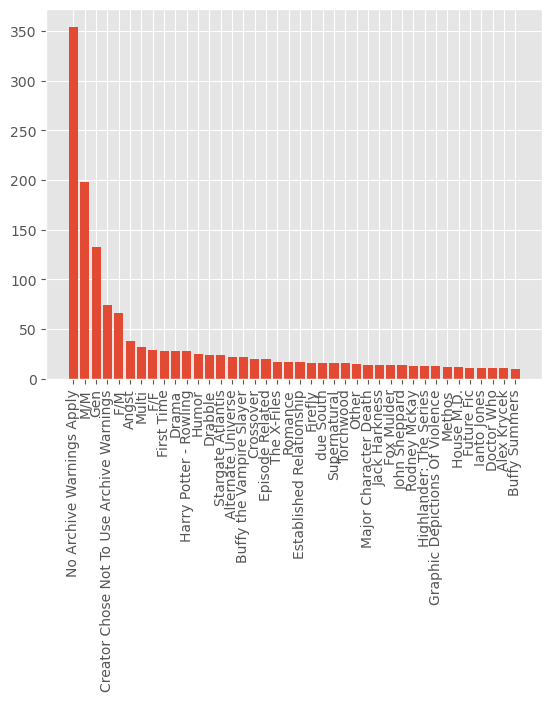

                                     Tag Name  Total Uses
0                   No Archive Warnings Apply         354
1                                         M/M         198
2                                         Gen         133
3   Creator Chose Not To Use Archive Warnings          74
4                                         F/M          66
5                                       Angst          38
6                                       Multi          32
7                                         F/F          29
8                                  First Time          28
9                                       Drama          28
10                     Harry Potter - Rowling          28
11                                      Humor          25
12                                    Drabble          24
13                          Stargate Atlantis          24
14                         Alternate Universe          22
15                   Buffy the Vampire Slayer          22
16            

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Graphing our Series
plt.bar(top_40.index.to_list(), top_40["Total Uses"])
plt.xticks(top_40.index.to_list(), top_40["Tag Name"], rotation = 90)
plt.show()

print(top_40)

By printing the top_40 data frame, we can see that 354 of the 469 works used the "No Archive Warnings Apply Tag". The second most popular tag was "M/M", which denotes that a work has a relationship between two men. The third most popular tag was "Gen". So the most popular tags seem to support the conclusion from earlier, that being that the majority of fics in our sample set are rated G for General. 

Before we continue our analysis of the tags, we are going to try to increase the number of works used from 10,000 to 50,000 in the hopes that there will a larger sample to represent the many, many works within the original data set.

## Schedule

- Week 4 (April 7th - April 13th): Figure out how to usefully analyze the text of each fan-work in the data set. Complete analysis of tags - their popularity, their use over time, etc.
- Week 5 (April 13th - April 19th): Complete readability analysis, comparing readability to popularity. Polish existing analysis and put into singular Jupyter notebook to submit. Perhaps expand current number of fics being analyzed for final analysis. Write up descriptions of what final data analysis finds.

## Peer Feedback

#### Feedback given by: 

The feedback given by Chetan Elenki, Augustine Takyi, and Kalpana Simhadri was of high-quality, indicating that they understood our project and had good ideas about how to improve it. Some of their ideas are summarized below:
- Instead of randomly sampling works, we could do something called stratified sampling - which involves breaking the data into relevant "strata" and sampling randomly from each. For example, in collecting a survey sample you may stratify your population in Male and Female groups, and randomly pick 50% of your total sample from each group.
- Having different sized samples for different questions, choosing sample size based on file size. For example, having a sample of 10,000 whole fan-works with text takes much more time to run code on and uses up much more storage space than having a sample of 10,000 fan-works with only meta-data attached.
- Using t-tests instead of z-tests, since the population variance is not known.

## Milestones

We have successfully completed many of the objectives as presented in our project proposal draft, discovering:
- Rating does relate to popularity.
- The various measures of popularity are tightly correlated.
- Length has some relation to popularity.
- There are possible mismatches between supply and demand - for example, longer works are broadly speaking more popular but works tend to be short.

On the skills side, we got practice with:
- cleaning and converting SQLLite to csv.
- Cutting up a large data-set into managable chunks.
- Sorting through and analyzing a new data-set, from "the wild".

However, there are still questions left to answer:
- How complicated/readable are fan-works compared to popular published fiction? How does readability relate to popularity?
- What are the most common tags? How do tags relate to popularity?

## Methods Milestones

We were planning to use different types of significance tests (t-tests and z-tests) and ordinary least squares regression tests to analyze our data. We have successfully used z and t statistical tests and we are currently working on getting ordinary least squares regression analyses for the data. 

We have also done several types of percentage evaluations to analyze our data, such as: the percentage of languages within the AO3 data and what percentage of hits, kudos, etc. are held by the top 1, 5, and 10% of fics.

## Summary

Using data from a web-scrapping project, we dowloanded information about millions of fan-works published on Archive Of Our Own. Then, after cleaning and converting the data into csv format, we conducted a variety of statistical tests on the "meta-data" of each fan-work, as presented in the **Analysis/Methods/Results** section. In the future, we will analyze the tags associated with each fan-work and the actual text of each fan-work.